# Getting Started in Machine Learning
### Chapter 15: LDA/QDA
This notebook contains examples from the book:

Getting Started in Machine Learning: Easy Recipes for Python 3, Scikit-Learn, Jupyter (2019) by Bella Romeo, Sherwood Forest Books, Los Angeles, CA, USA, ISBN-13: 978-0-9966860-6-8

(c) Copyright 2019.

<font style="font-size:xx-small; font-family:courier;">

    This notebook is free software: you can redistribute it and/or modify
    it under the terms of the GNU General Public License as published by
    the Free Software Foundation, either version 3 of the License, or
    (at your option) any later version.

    This program is distributed in the hope that it will be useful,
    but WITHOUT ANY WARRANTY; without even the implied warranty of
    MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
    GNU General Public License for more details.

    You should have received a copy of the GNU General Public License
    along with this program. If not, see <https://www.gnu.org/licenses/>.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
data=pd.read_fwf("https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data",
           header=None,na_values="?")
data.columns=("mpg","cyl","displ","hp","weight","accel","model","origin","carname")
data = data.dropna(axis=0)
data[:3]

,mpg,cyl,displ,hp,weight,accel,model,origin,carname
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,"""buick skylark 320"""
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,"""plymouth satellite"""


In [3]:
cardata=np.array(data[["cyl","mpg","accel"]])
cars=np.array([line for line in cardata if line[0] in [4,6,8]])
Y=cars[:,0]/2-2
X=cars[:,1:]

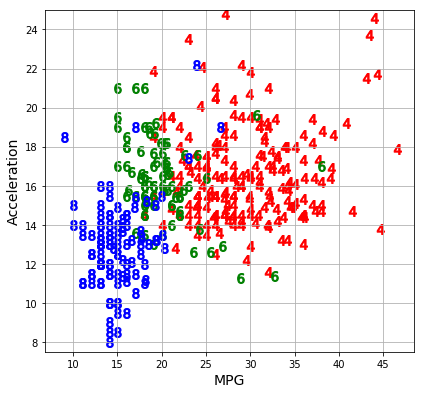

In [4]:
colors=["red", "green","blue"]
markers=["$4$","$6$","$8$"]
nclasses=3
for i in range(nclasses):
    x,y=zip(*X[Y==i])
    plt.scatter(x,y,marker=markers[i],color=colors[i],s=100)

plt.xlabel("MPG",fontsize=14)
plt.ylabel("Acceleration",fontsize=14)
plt.ylim([7.5,25])
plt.grid()
fig=plt.gcf()
fig.tight_layout()
fig.set_size_inches(6,6)

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import warnings
warnings.filterwarnings("error")

In [6]:
errs=[]
nsplits=100
skipped=0
for j in range(nsplits):
  try:
    XTRAIN, XTEST, YTRAIN, YTEST=train_test_split(X,Y)
    LDA = LinearDiscriminantAnalysis()
    LDA.fit(XTRAIN,YTRAIN)
    YP=LDA.predict(XTEST)
    errs.append(1-accuracy_score(YTEST,YP))
  except UserWarning:
    skipped+=1
    continue
print("LDA mean error=%7.5f std=%7.5f" %(np.mean(errs),np.std(errs)))
print(skipped,"train/test splits had to be skipped because of Normalization Errors")

LDA mean error=0.12309 std=0.02852
1 train/test splits had to be skipped because of Normalization Errors


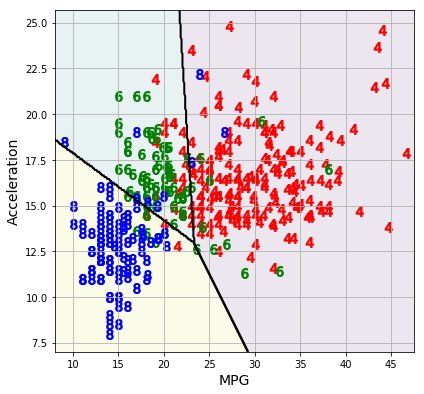

In [7]:
def visualize_classifier_contours(clf,X,Y,DX,DY,thelevels,colors,markers,xlab="X",
                                ylab="Y", filename='classifier-figure.pdf'):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, DX),
                     np.arange(y_min, y_max, DY))
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    c=plt.contour(xx, yy, Z, alpha=1,levels=thelevels,linewidths=2,colors="k")
    c=plt.contourf(xx, yy, Z, alpha=.1)
        
    nclasses=len(colors)
    for i in range(nclasses):
        x,y=zip(*X[Y==i])
        plt.scatter(x,y,marker=markers[i],color=colors[i],s=100)


    plt.xlabel(xlab,fontsize=14)
    plt.ylabel(ylab,fontsize=14)
    #plt.ylim([7.5,25])
    plt.grid()
    fig=plt.gcf()
    fig.tight_layout()
    fig.set_size_inches(6,6)
    fig.savefig(filename)
    
colors=["red", "green","blue"]
markers=["$4$","$6$","$8$"]

visualize_classifier_contours(LDA,X,Y,.1,.1, [0.5,1.5],colors,markers,"MPG","Acceleration",
                            filename="LDA-MPG-decision-boundaries.pdf")

## QDA Prediction - 2 Feature

In [8]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

In [9]:
errs=[]
nsplits=100
skipped=0
for j in range(nsplits):
  try:
    XTRAIN, XTEST, YTRAIN, YTEST=train_test_split(X,Y)
    model = QDA()
    model.fit(XTRAIN,YTRAIN)
    YP=model.predict(XTEST)
    errs.append(1-accuracy_score(YTEST,YP))
  except UserWarning:
    skipped+=1
    continue
print("QDA mean eror=%7.5f std=%7.5f" %(np.mean(errs),np.std(errs)))
print(skipped,"train/test splits had to be skipped because of Normalization Errors")

QDA mean eror=0.13577 std=0.03299
0 train/test splits had to be skipped because of Normalization Errors


## QDA Visualization

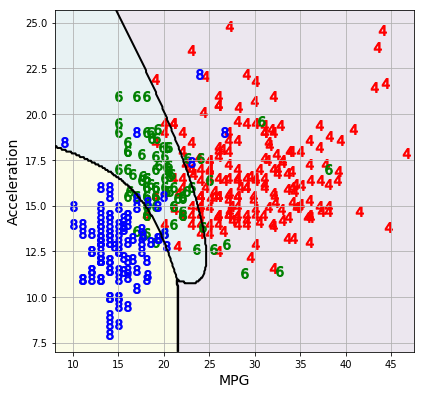

In [10]:
visualize_classifier_contours(model,X,Y,.1,.1, [0.5,1.5],colors,markers,"MPG","Acceleration",
                            filename="QDA-MPG-decision-boundaries.pdf")

## Increase number of features to 4

In [11]:
data.columns

Index(['mpg', 'cyl', 'displ', 'hp', 'weight', 'accel', 'model', 'origin',
       'carname'],
      dtype='object')

In [12]:
X=np.array(data[["cyl","mpg","displ","hp","accel"]])
X=np.array([line for line in X if line[0] in [4,6,8]])
Y=X[:,0]/2-2
X=X[:,1:]

In [13]:
errs=[]
nsplits=100
skipped=0
for j in range(nsplits):
  try:
    XTRAIN, XTEST, YTRAIN, YTEST=train_test_split(X,Y)
    LDA = LinearDiscriminantAnalysis()
    LDA.fit(XTRAIN,YTRAIN)
    YP=LDA.predict(XTEST)
    errs.append(1-accuracy_score(YTEST,YP))
  except UserWarning:
    skipped+=1
    continue
print("LDA mean error=%7.5f std=%7.5f" %(np.mean(errs),np.std(errs)))
print(skipped,"train/test splits had to be skipped because of Normalization Errors")

LDA mean error=0.05122 std=0.02075
5 train/test splits had to be skipped because of Normalization Errors


 ## We can't use the 3/5 cylinder data because there are not enough data points for the QDA algorithm to converge

In [14]:
X=np.array(data[["cyl","mpg","displ","hp","accel"]])
X=np.array([line for line in X if line[0] in [4,6,8]])
Y=X[:,0]/2-2
X=X[:,1:]

In [15]:
errs=[]
nsplits=100
skipped=0
for j in range(nsplits):
  try:
    XTRAIN, XTEST, YTRAIN, YTEST=train_test_split(X,Y)
    qda = QDA()
    qda.fit(XTRAIN,YTRAIN)
    YP=qda.predict(XTEST)
    errs.append(1-accuracy_score(YTEST, YP))
  except UserWarning:
    skipped+=1
    continue
print("QDA mean error=%7.5f std=%7.5f" %(np.mean(errs),np.std(errs)))
print(skipped,"train/test splits had to be skipped because of Normalization Errors")

QDA mean error=0.03412 std=0.01790
0 train/test splits had to be skipped because of Normalization Errors
